# Budget Analysis

---

## Environment Setup

In [458]:
# Initial Imports
import os
import plaid
import requests
import datetime
import json
import pandas as pd
from dotenv import load_dotenv
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline

In [459]:
# Helper functions

def pretty_print_response(response):
    """
    This function formats a JSON file to pretty printing it in the screen.
    """
    print(json.dumps(response, indent=4, sort_keys=True))

In [460]:
# Set environment variables from the .env file
load_dotenv()

True

In [461]:
# Extract API keys from environment variables
PLAID_CLIENT_ID = os.getenv("PLAID_CLIENT_ID")
PLAID_SBX_SECRET_KEY = os.getenv("PLAID_SBX_SECRET_KEY")
PLAID_PUBLIC_KEY = os.getenv("PLAID_PUBLIC_KEY")

---

## Plaid Access Token

In this section, you will use the `plaid-python` API to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:

1. Create a client to connect to plaid

2. Use the client to generate a public token and request the following items: ['transactions', 'income', 'assets']

3. Exchange the public token for an access token

4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [462]:
# Create the client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')


In [463]:
# Set the institution id
INSTITUTION_ID = "ins_109508"

### 2. Generate a public token

In [464]:
# Create the public token
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

# Print the public token
print(create_tkn_response)

{'public_token': 'public-sandbox-6b70bdd6-963d-4e5d-bcfa-d4208d7e89c3', 'request_id': 'efwvbUHky1omWOM'}


### 3. Exchange the public token for an access token

In [465]:
# Retrieve the access token
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])

# Print the access toke
print(exchange_response)

{'access_token': 'access-sandbox-4eb65401-e922-4684-b8a1-ffc1bdace7d6', 'item_id': '6Z9QAJ6NDJIGJl14xRLLsQ58wL5Ayzug33EGy', 'request_id': 'e6fCCK8tlbaSN0b'}


In [466]:
# Store the access token in a Python variable
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [467]:
# Retrieve accounts
transaction_response = client.Accounts.get(access_token)
#client.Accounts.get(access_token)
# Print accounts
print(json.dumps(transaction_response['accounts'],indent=4, sort_keys=True))

[
    {
        "account_id": "yQ8NP9Kz19fg67r5dDPPHjwlXbV5VQtyXXKx8",
        "balances": {
            "available": 100,
            "current": 110,
            "iso_currency_code": "USD",
            "limit": null,
            "unofficial_currency_code": null
        },
        "mask": "0000",
        "name": "Plaid Checking",
        "official_name": "Plaid Gold Standard 0% Interest Checking",
        "subtype": "checking",
        "type": "depository"
    },
    {
        "account_id": "9L91bW7NXWIW8eZDLGVVSX8lo5p7pwtRQQqjo",
        "balances": {
            "available": 200,
            "current": 210,
            "iso_currency_code": "USD",
            "limit": null,
            "unofficial_currency_code": null
        },
        "mask": "1111",
        "name": "Plaid Saving",
        "official_name": "Plaid Silver Standard 0.1% Interest Saving",
        "subtype": "savings",
        "type": "depository"
    },
    {
        "account_id": "vj8dabD9Qbswly3q9rNNS8QaknwqwDiWkkvre"

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days

2. Print the categories for each transaction type

3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)

4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [468]:
# Set the start and end date 90 days from today
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Retrieve the transactions for the last 90 days
transaction_response = client.Transactions.get(access_token,start_date,end_date)
# print(json.dumps(transaction_response,indent=4, sort_keys=True))
# Print the transactions
print(json.dumps(transaction_response['transactions'],indent=4, sort_keys=True))

[
    {
        "account_id": "RNxd7JMXnJILVpZDxe33FGlJVn4v4WcRbbP8p",
        "account_owner": null,
        "amount": 78.5,
        "authorized_date": null,
        "category": [
            "Recreation",
            "Gyms and Fitness Centers"
        ],
        "category_id": "17018000",
        "date": "2020-07-12",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "merchant_name": "Touchstone",
        "name": "Touchstone Climbing",
        "payment_channel": "in store",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "referen

### 2. Print the categories for each transaction

In [469]:
# Create a for-loop to print the categories for each transaction
for transactions in transaction_response['transactions']:
    print(json.dumps(transactions['category'], indent=4, sort_keys=True))

[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Food and Drink",
    "Restaurants",
    "Coffee Shop"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Transfer",
    "Credit"
]
[
    "Travel",
    "Airlines and Aviation Services"
]
[
    "Travel",
    "Taxi"
]
[
    "Food and Drink",
    "Restaurants"
]
[
    "Payment"
]
[
    "Food and Drink",
    "Restaurants",
    "Fast Food"
]
[
    "Shops",
    "Sporting Goods"
]
[
    "Payment",
    "Credit Card"
]
[
    "Travel",
    "Taxi"
]
[
    "Transfer",
    "Debit"
]
[
    "Transfer",
    "Deposit"
]
[
    "Recreation",
    "Gyms and Fitness Centers"
]
[
    "Travel",
    "Airlines and Aviation Services"
]


### 3. Create a new DataFrame using the following fields from the JSON transaction data: `date`, `name`, `amount`, `category`. 

(For categories with more than one label, just use the first category label in the list)

In [470]:
# Define an empty DataFrame and set the columns as date, name, amount, and category
amounts = []
categories = []
dates = []
names = []
column_names = ['name','date','category','amount']
df_trans = pd.DataFrame(columns=column_names)

# Retrieve all the transactions
for transactions in transaction_response['transactions']:
    amounts.append(json.dumps(transactions['amount'],sort_keys=True))
    categories.append(json.dumps(transactions['category'],sort_keys=True))
    dates.append(json.dumps(transactions['date'],sort_keys=True))
    names.append(json.dumps(transactions['name'],sort_keys=True))

# Populate the transactions DataFrame with the transactions data
df_trans['amount']=amounts
df_trans['category']=categories
df_trans['date']=dates
df_trans['name']=names
# Display sample data from the DataFrame    
df_trans.head()

,name,date,category,amount
0,"""Touchstone Climbing""","""2020-07-12""","[""Recreation"", ""Gyms and Fitness Centers""]",78.5
1,"""United Airlines""","""2020-07-12""","[""Travel"", ""Airlines and Aviation Services""]",-500
2,"""McDonald's""","""2020-07-11""","[""Food and Drink"", ""Restaurants"", ""Fast Food""]",12
3,"""Starbucks""","""2020-07-11""","[""Food and Drink"", ""Restaurants"", ""Coffee Shop""]",4.33
4,"""SparkFun""","""2020-07-10""","[""Food and Drink"", ""Restaurants""]",89.4


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [471]:
# Display data types
df_trans.dtypes

name        object
date        object
category    object
amount      object
dtype: object

In [472]:
# Make any required data type transformation
df_trans['name'] = df_trans['name'].apply(lambda x: x.replace('"', '').replace(',', '')).astype('object')
df_trans['date'] = df_trans['date'].apply(lambda x: x.replace('"', '').replace(',', '')).astype('datetime64')
df_trans['category'] = df_trans['category'].apply(lambda x: x.replace('"', '').replace('[', '').replace(']','')).astype('object')
df_trans['amount'] = df_trans['amount'].astype('float64')
df_trans.head()

,name,date,category,amount
0,Touchstone Climbing,2020-07-12,"Recreation, Gyms and Fitness Centers",78.50
1,United Airlines,2020-07-12,"Travel, Airlines and Aviation Services",-500.00
2,McDonald's,2020-07-11,"Food and Drink, Restaurants, Fast Food",12.00
3,Starbucks,2020-07-11,"Food and Drink, Restaurants, Coffee Shop",4.33
4,SparkFun,2020-07-10,"Food and Drink, Restaurants",89.40


In [473]:
# Set the date column as index
df_trans.set_index(df_trans['date'],inplace=True)
# Display sample data
df_trans.head()

,name,date,category,amount
date,,,,
2020-07-12,Touchstone Climbing,2020-07-12,"Recreation, Gyms and Fitness Centers",78.50
2020-07-12,United Airlines,2020-07-12,"Travel, Airlines and Aviation Services",-500.00
2020-07-11,McDonald's,2020-07-11,"Food and Drink, Restaurants, Fast Food",12.00
2020-07-11,Starbucks,2020-07-11,"Food and Drink, Restaurants, Coffee Shop",4.33
2020-07-10,SparkFun,2020-07-10,"Food and Drink, Restaurants",89.40


In [474]:
new_cat = df_trans["category"].str.split(", ", n = 1, expand = True) 
df_trans["category1"]= new_cat[0]
df_trans["category2"]= new_cat[1]
df_trans.head()

,name,date,category,amount,category1,category2
date,,,,,,
2020-07-12,Touchstone Climbing,2020-07-12,"Recreation, Gyms and Fitness Centers",78.50,Recreation,Gyms and Fitness Centers
2020-07-12,United Airlines,2020-07-12,"Travel, Airlines and Aviation Services",-500.00,Travel,Airlines and Aviation Services
2020-07-11,McDonald's,2020-07-11,"Food and Drink, Restaurants, Fast Food",12.00,Food and Drink,"Restaurants, Fast Food"
2020-07-11,Starbucks,2020-07-11,"Food and Drink, Restaurants, Coffee Shop",4.33,Food and Drink,"Restaurants, Coffee Shop"
2020-07-10,SparkFun,2020-07-10,"Food and Drink, Restaurants",89.40,Food and Drink,Restaurants


---

# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:

1. Determine the previous year's gross income and print the results

2. Determine the current monthly income and print the results

3. Determine the projected yearly income and print the results

In [479]:
# Fetch de income data
transaction_response = client.Income.get(access_token)
client.Income.get(access_token)

# Print the income data
print(json.dumps(transaction_response['income'],indent=4, sort_keys=True))

{
    "income_streams": [
        {
            "confidence": 0.99,
            "days": 720,
            "monthly_income": 500,
            "name": "UNITED AIRLINES"
        }
    ],
    "last_year_income": 6500,
    "last_year_income_before_tax": 7893,
    "max_number_of_overlapping_income_streams": 1,
    "number_of_income_streams": 1,
    "projected_yearly_income": 6085,
    "projected_yearly_income_before_tax": 7389
}


In [480]:
# Determine the previous year's gross income and print the results
PYGI = transaction_response['income']['last_year_income_before_tax']
print("Prior year gross income: " + str(PYGI))

Prior year gross income: 7893


In [481]:
# Determine the current monthly income and print the results
CMI = transaction_response['income']['income_streams'][0]['monthly_income']
print("Current monthly income: " + str(CMI))

Current monthly income: 500


In [482]:
# Determine the projected yearly income and print the results
PYI = CMI * 12
PYIBT = transaction_response['income']['last_year_income_before_tax']
print("Projected yearly income is between " + str(PYI) + " and " + str(PYIBT))

Projected yearly income is between 6000 and 7893


---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)

2. Generate a bar chart with the number of transactions for each category

3. Calulate the expenses per month

4. Plot the total expenses per month

### Calculate the expenses per category

In [492]:
# Compute the total expenses per category
df_trans_grp = df_trans.groupby('category1').sum()
# Display the expenses per catefory
print(df_trans_grp)

                 amount
category1              
Food and Drink  1105.73
Payment         2103.50
Recreation       157.00
Shops            500.00
Transfer        6845.78
Travel          -488.27


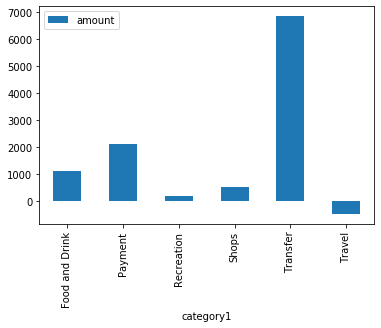

In [494]:
# Create a spending categories pie chart.
df_trans_grp.plot(kind='bar')

# df_trans_grp.plot.pie(y='amount', figsize=(5, 5))
# Pie charts do not accept negative values

### Calculate the expenses per month

In [2]:
# Create a DataFrame with the total expenses
# I am confused...we've already pulled the the income & expense data. I'm moving onto the next section. 

# Print the income data

# Display sample data


In [ ]:
# Create a spending per month bar chart
